In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score

In [107]:
df = pd.read_csv('E:/Netzwerk/Practice/Salary_Data.csv')

In [108]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [109]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [110]:
df.shape

(30, 2)

In [111]:
#check for missing values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [112]:
#Check for categorical values
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

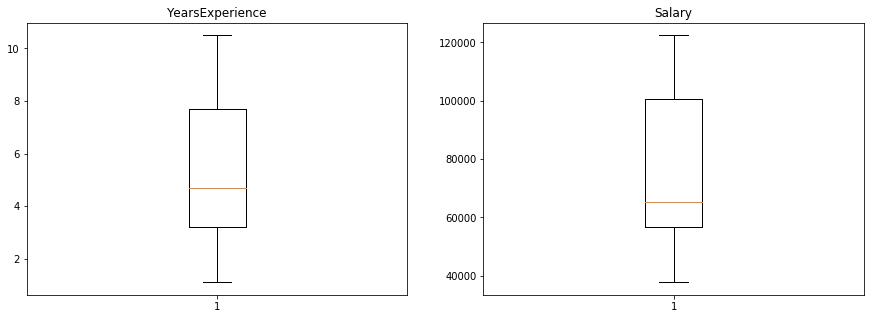

In [113]:
plt.figure(figsize = (15,5))
count=1
for col in df:
    plt.subplot(1,2,count)
    plt.boxplot(df[col])
    plt.title(col)
    count +=1
    
plt.show()

In [114]:
#Seperating X and y
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [115]:
#Normatilzation

X = preprocessing.StandardScaler().fit_transform(X)

In [116]:
# diving into train and test

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [117]:
regressor = LinearRegression()

In [118]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
ypredict = regressor.predict(X_test)

In [122]:
r2_score(y_test, ypredict)

0.9248580247217075

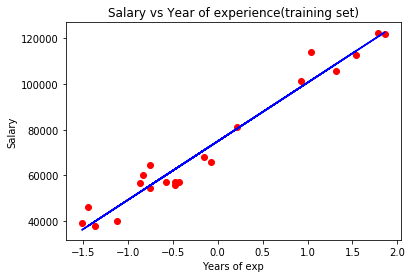

In [125]:
#visualising the training set
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'blue')
plt.title('Salary vs Year of experience(training set)')
plt.xlabel('Years of exp')
plt.ylabel('Salary')
plt.show()

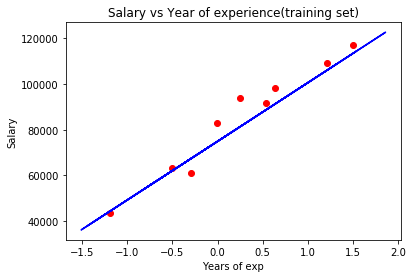

In [127]:
#visualising the test set
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'blue')
plt.title('Salary vs Year of experience(training set)')
plt.xlabel('Years of exp')
plt.ylabel('Salary')
plt.show()

In [132]:
prediction_output = pd.DataFrame(data=[y_test.values, ypredict], index = ['y_test','ypredict']).transpose

In [131]:
prediction_output.to_csv('E:/Netzwerk/Practice/Salary_Data_Output.csv')

In [133]:
prediction_output

,0,1,2,3,4,5,6,7,8
y_test,83088.000000,98273.000000,63218.000000,93940.000000,61111.000000,91738.000000,116969.000000,43525.000000,109431.00000
ypredict,74821.415786,91385.436263,61938.288749,81262.979305,67459.628908,88624.766184,113470.796899,44454.044912,106109.01002
